In [1]:
import numpy as np
from scipy.fft import fft, ifft, fftshift
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
with open('data_set_1.pkl', 'rb') as f:
    data_set_1 = pickle.load(f)

with open('data_set_2.pkl', 'rb') as f:
    data_set_2 = pickle.load(f)

xvals1 = data_set_1[:, 0]
yvals1 = data_set_1[:, 1]

xvals2 = data_set_2[:, 0]
yvals2 = data_set_2[:, 1]

In [3]:
def xp_mat_maker(xvals, p):
    xp = np.ones((xvals.size, p+1))
    for jj in range(p):
        xp[:, jj+1] = xvals * xp[:, jj]
    return xp

In [4]:
def cos_mat_maker(xvals, freqs):
    cp = np.ones((xvals.size, len(freqs)))
    for jj, freq in enumerate(freqs):
        cp[:, jj] = np.cos(freq * xvals)
    return cp

In [5]:
def least_squares_solve(mat, yvals):
    u, s, vt = np.linalg.svd(mat, full_matrices=False)
    alpha = (vt.T @ np.diag(1./s) @ u.T) @ yvals.reshape(-1, 1)
    error = np.linalg.norm(mat @ alpha - yvals.reshape(-1, 1))
    return alpha, error 

**Problem 1**: Using a least-squares approach, find a polynomial model of the data set represented by `xvals1` and `yvals1`, i.e. find $p$ and corresponding $\alpha_{l}$ such that 

$$
y_{j} \approx \sum_{l=0}^{p}\alpha_{l}x_{j}^{l}
$$

Please explain how you arrived at your choice for $p$.  What is the condition number of your matrix $X_{p}$?  How does this value influence your choice of $p$? 

In [22]:
pval = # well, what do you think?  
xp = xp_mat_maker(xvals, p)
alpha, error = least_squares_solve(xp, yvals1)

SyntaxError: invalid syntax (846514351.py, line 1)

In [ ]:
plt.plot(xvals1, xp @ alpha, color='k', ls='--')
plt.scatter(xvals1, yvals1, color='r', s = 1.)
plt.xlabel(r"$x$")
plt.ylabel(r"$y(x)$")

**Problem 2**: Using a least-squares approach, find a cos model of the data set reprsented by `xvals2` and `yvals2`.  In other finds, find $\alpha_{l}$ and $\omega_{l}$ such that

$$
y_{j} \approx \sum_{l=0}^{p}\alpha_{l}\cos(\omega_{l}x_{j}).
$$

To figure out the frequencies, you need to use an FFT.  Then you find the $\alpha_{l}$ terms using least-squares fitting.  Explain your choice of frequencies and the quality of fit that this gives you to your data set.  

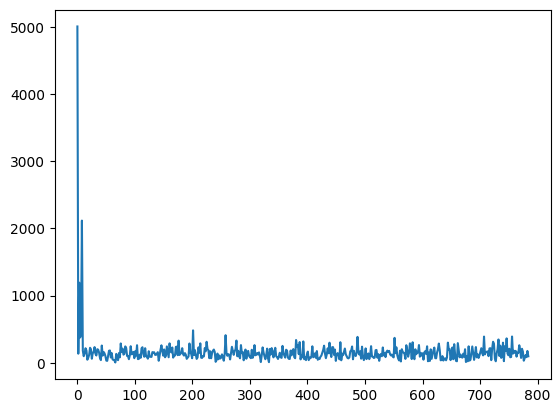

In [19]:
npts = yvals2.size
kvals = np.arange(int(npts/2)) * 2.*np.pi/xvals2[-1] # scale using period equal to max of xval
yfreq_plot = np.abs(fft(yvals2))[:int(npts/2)]
plt.plot(kvals, yfreq_plot) # you might want to use slicing to zoom in on the frequencies you're most interested in

In [20]:
freqs = #what frequencies are you going to pick?
cp = cos_mat_maker(xvals2, freqs)
alpha, error = least_squares_solve(cp, yvals2)

[[ 5.08256921]
 [ 2.45510481]
 [-1.05096953]]


Text(0, 0.5, '$y(x)$')

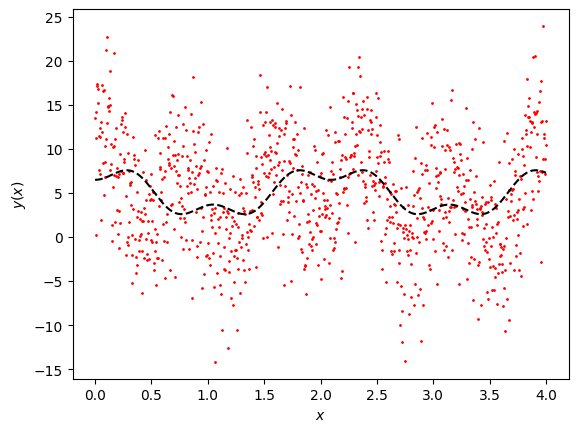

In [21]:
plt.plot(xvals2, cp @ alpha, color='k', ls='--')
plt.scatter(xvals2, yvals2, color='r', s = 1.)
plt.xlabel(r"$x$")
plt.ylabel(r"$y(x)$")

**Problem 3**: In $\mathbb{R}^{n}$ with a fixed vector ${\bf a}$ describe the following sets.  Illustrate your descriptions via examples in $n=2$ and $n=3$.  Remember that for real vectors 
$$
\left<{\bf a},{\bf x}\right>=\left<{\bf x},{\bf a}\right>={\bf x}^{T}{\bf a}={\bf a}^{T}{\bf x}.
$$
  * $\left\{{\bf x}\in \mathbb{R}^{n} : \left<{\bf a},{\bf x}\right>=0\right\}$
  * $\left\{{\bf x}\in \mathbb{R}^{n} : \left<{\bf a},{\bf x}\right>\geq 0\right\}$
  * $\left\{{\bf x}\in \mathbb{R}^{n} : \left<{\bf a},{\bf x}\right>= c, ~c > 0\right\}$
  * $\left\{{\bf x}\in \mathbb{R}^{n} : \left<{\bf a},{\bf x}\right> \geq c, ~c > 0\right\}$

**Problem 4**: Following up on the previous problem, suppose I give you an underdetermined real matrix $A$ which is $k\times n$, $k<n$.  By the inequality $A{\bf x} \leq {\bf b}$, with ${\bf b}\in \mathbb{R}^{k}$, we mean this component-by component so that 
$$
(A{\bf x})_{j} \leq b_{j}, ~ j=1, \cdots, k.  
$$
How would you describe the shape formed by those ${\bf x}$ such that $A{\bf x} \leq {\bf b}$?  Illustrate your description in dimensions $n=2$ and $n=3$.  Are there cases when these inequalities don't make sense, which is to say, they cannot be satisfied?  

**Problem 5**: A subset $E\subset \mathbb{R}^{n}$ is called _convex_ if for all ${\bf x}, {\bf y} \in E$, $t{\bf x} + (1-t){\bf y}\in E$ for $t\in[0,1]$.  This is equivalent to saying that a convex set is one that contains all of its line segments.  Show from the prior problem that $A{\bf x}\leq {\bf b}$ forms a convex set in $\mathbb{R}^{n}$.

**Problem 6**: (Graduate/Challenge) Suppose we have the objective function 
$$
f({\bf x}) = \frac{1}{2}\left<H{\bf x},{\bf x}\right> + \left<{\bf x},{\bf v}\right> = \frac{1}{2}{\bf x}^{T}H{\bf x} + {\bf v}^{T}{\bf x}, 
$$
where $H$ is a real $n\times n$, positive definite matrix (that means symmetric with all positive eigenvalues, so that $H=O\Sigma^{2}O^{T}$, $OO^{T}=I$), and ${\bf v}\in\mathbb{R}^{n}$.  Find ${\bf x}_{\ast} = \mbox{arg min} f({\bf x})$ subject to the constraint $A{\bf x} \leq {\bf b}$, where $A$ is a real, underdetermined $k\times n$ matrix (i.e. k<n) of full rank.  

* Start by finding the critical points of the affiliated Lagrangian $L({\bf x}, \boldsymbol{\lambda})$ where
$$
L({\bf x}, {\bf \lambda}) = f({\bf x}) + \boldsymbol{\lambda}^{T}A{\bf x}, ~ \boldsymbol{\lambda} \in \mathbb{R}^{k}.
$$
Show that the critical ${\bf x}$, say ${\bf x}_{\ast}$ is given by ${\bf x}_{\ast} = -H^{-1}({\bf v} + A^{T}\boldsymbol{\lambda})$.  Note, the critical points are found by solving 
$$
\frac{\partial L}{\partial x_{j}} = 0, ~ j=1, \cdots, n,
$$
for all components.  The substitution ${\bf u} = O^{T}{\bf x}$ is still useful here.  

* Show that $f({\bf x}_{\ast}) = \frac{1}{2}\left(\boldsymbol{\lambda}^{T}A-{\bf v}^{T}\right)H^{-1}({\bf v} + A^{T}\boldsymbol{\lambda}) = -\frac{1}{2}\left<{\bf v}, H^{-1}{\bf v}\right> + \frac{1}{2}\left<\boldsymbol{\lambda}, AH^{-1}A^{T}\boldsymbol{\lambda} \right>$.  Note, for real vectors $\left<{\bf u}, {\bf v}\right> = \left<{\bf v}, {\bf u}\right>$, which will be useful in getting terms to disappear.  
* Show that the inequality constraint can be written as $AH^{-1}A^{T}\boldsymbol{\lambda} \geq -\left({\bf b} + AH^{-1}{\bf v}\right)$.
* Show that $AH^{-1}A^{T}$ is a positive definite $k\times k$ matrix and thus $\left<\boldsymbol{\lambda}, AH^{-1}A^{T}\boldsymbol{\lambda} \right> \geq 0$ for all $\boldsymbol{\lambda} \in \mathbb{R}^{k}$.
* Find the solution for $k=1$, which means $AH^{-1}A^{T} = c > 0$ (you'll have to stare at that for a second to believe me).  We'll explore the full solution later.  